<a href="https://colab.research.google.com/github/sehab1611251/Discriminative-and-Generative-Classifiers-for-handwritten-digits/blob/main/Discriminative_and_Generative_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading the Dataset
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255.

In [ ]:
print(X.head(3))

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  

[3 rows x 784 columns]


In [ ]:
y.head(3)

0    5
1    0
2    4
Name: class, dtype: int64

In [ ]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

5


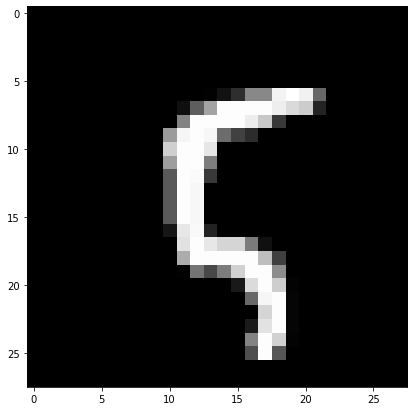

In [ ]:
plt.figure(figsize=(7,7))
index=100
aSampleImage = X.iloc[index].to_numpy().reshape(28, 28)
plt.imshow(np.reshape(aSampleImage, (28,28)), cmap=plt.cm.gray)
print(y[index])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
X_data, X_test_data, y_data, y_test_data = train_test_split( X, y, test_size=0.20, random_state=42 ) # splitting 20% data to test the model later

In [ ]:
X_data.shape

(56000, 784)

In [ ]:
y_data.shape

(56000,)

In [ ]:
# To get the execution time for each cell
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
time: 468 µs (started: 2022-12-16 11:29:26 +00:00)


In [ ]:
from sklearn.model_selection import KFold
CV = KFold(n_splits=10) # configuring 10 fold cross validation
CV

KFold(n_splits=10, random_state=None, shuffle=False)

time: 5.25 ms (started: 2022-12-14 12:17:15 +00:00)


In [ ]:
X_data = X_data.to_numpy() #converting data frame to numpy array
y_data =y_data.to_numpy() #converting data frame to numpy array

time: 1.25 ms (started: 2022-12-16 11:29:26 +00:00)


In [ ]:
X_test_data=X_test_data.to_numpy() #converting data frame to numpy array
y_test_data=y_test_data.to_numpy() #converting data frame to numpy array

time: 882 µs (started: 2022-12-16 11:29:26 +00:00)


**1. SVM  using linear, polynomial of degree 2, and RBF kernels**

In [ ]:
from sklearn import svm

time: 158 ms (started: 2022-12-16 11:29:26 +00:00)


1.1 SVM  implementation using Linear Kernel

In [ ]:
C_values=[1,2,3,4,5,6,7,8,9,10] # selecting a parameter list

time: 572 µs (started: 2022-12-13 11:54:41 +00:00)


In [ ]:
i=0
for train_index, test_index in CV.split(X_data):  #applying 10 fold cross validation
    LinearModel = svm.SVC(kernel='linear',C=C_values[i],random_state = 42) #Linear SVM Kernel
    LinearModel.fit(X_data[train_index], y_data[train_index])
    print("For C=", C_values[i] , "Model Accuracy:", (LinearModel.score(X_data[test_index], y_data[test_index]))*100 , "%")
    i+=1

For C= 1 Model Accuracy: 93.44642857142857 %
For C= 2 Model Accuracy: 92.94642857142857 %
For C= 3 Model Accuracy: 92.60714285714286 %
For C= 4 Model Accuracy: 92.64285714285714 %
For C= 5 Model Accuracy: 92.44642857142857 %
For C= 6 Model Accuracy: 92.92857142857143 %
For C= 7 Model Accuracy: 92.75 %
For C= 8 Model Accuracy: 92.92857142857143 %
For C= 9 Model Accuracy: 92.64285714285714 %
For C= 10 Model Accuracy: 92.85714285714286 %
time: 43min 8s (started: 2022-12-13 11:55:16 +00:00)


In [ ]:
print("Model Score:", LinearModel.score(X_test_data, y_test_data) * 100, "%") # Evaluating model with completely unseen data
print("\n")

Model Score: 92.30000000000001 %


time: 1min 3s (started: 2022-12-13 12:52:02 +00:00)


1.2 SVM  implementation using Polynomial Kernel of degree=2

In [ ]:
from sklearn.model_selection import KFold
CV = KFold(n_splits=10) # configuring 10 fold cross validation
CV

In [ ]:
for train_index, test_index in CV.split(X_data):  #applying 10 fold cross validation
    PolynomialModel = svm.SVC(kernel='poly', degree=2) #Polynomial kernel with degree 2
    PolynomialModel.fit(X_data[train_index], y_data[train_index])
    print("Model Accuracy:", (PolynomialModel.score(X_data[test_index], y_data[test_index]))*100 , "%")

Model Accuracy: 97.5 %
Model Accuracy: 97.53571428571428 %
Model Accuracy: 97.55357142857143 %
Model Accuracy: 97.66071428571429 %
Model Accuracy: 97.48214285714286 %
Model Accuracy: 97.67857142857143 %
Model Accuracy: 97.58928571428571 %
Model Accuracy: 97.53571428571428 %
Model Accuracy: 97.23214285714286 %
Model Accuracy: 97.53571428571428 %
time: 28min 22s (started: 2022-12-13 19:17:25 +00:00)


In [ ]:
print("Model Accuracy:", PolynomialModel.score(X_test_data, y_test_data) * 100, "%") # Evaluating model with completely unseen data

Model Accuracy: 97.37142857142858 %
time: 1min 2s (started: 2022-12-13 19:52:19 +00:00)


1.3 SVM implementation using RBF Kernel

In [ ]:
from sklearn.model_selection import KFold
CV = KFold(n_splits=5) # configuring 5 fold cross validation since RBF kernel takes a long time in 10 fold
CV

KFold(n_splits=5, random_state=None, shuffle=False)

time: 3.97 ms (started: 2022-12-16 11:30:38 +00:00)


In [ ]:
C_values=[1,3,5,7,9] # selecting a parameter list of C values
gamma_Values=[.2, .4, .5, .7, .9] # selecting a parameter list of gamma values

time: 549 µs (started: 2022-12-14 07:18:09 +00:00)


In [ ]:
i=0
for train_index, test_index in CV.split(X_data):  #applying 5 fold cross validation
    RBFmodel = svm.SVC(kernel='rbf',C=C_values[i],gamma=gamma_Values[i]) # RBF Kernel
    RBFmodel.fit(X_data[train_index], y_data[train_index])
    print("For C=", C_values[i] , "and gamma=", gamma_Values[i], "Model Accuracy:", (RBFmodel.score(X_data[test_index], y_data[test_index]))*100 , "%")
    i+=1

For C= 1 and gamma= 0.2 Model Accuracy: 66.51785714285714 %
For C= 3 and gamma= 0.4 Model Accuracy: 29.598214285714285 %
For C= 5 and gamma= 0.5 Model Accuracy: 25.34821428571429 %
For C= 7 and gamma= 0.7 Model Accuracy: 18.3125 %
For C= 9 and gamma= 0.9 Model Accuracy: 17.544642857142854 %
time: 8h 8min (started: 2022-12-13 21:29:50 +00:00)


In [ ]:
print("Model Score:", RBFmodel.score(X_test_data, y_test_data) * 100 ,"%") # Evaluating model with completely unseen data

Model Score: 18.3 %
time: 10min 21s (started: 2022-12-14 06:37:48 +00:00)


Since a small increase in Gamma and C values affected the result sharply, I have trained the model again with the different sets of parameters where C and Gamma increase very slowly.

In [ ]:
C_values=[1,2,3,4,5] # selecting a parameter list of C values
gamma_Values=[.05, .06, .07, .08, .09] # selecting a parameter list of gamma values

time: 743 µs (started: 2022-12-16 11:30:24 +00:00)


In [ ]:
i=0
for train_index, test_index in CV.split(X_data):  #applying 5 fold cross validation
    RBFmodel = svm.SVC(kernel='rbf',C=C_values[i],gamma=gamma_Values[i]) # RBF Kernel
    RBFmodel.fit(X_data[train_index], y_data[train_index])
    print("For C=", C_values[i] , "and gamma=", gamma_Values[i], "Model Accuracy:", (RBFmodel.score(X_data[test_index], y_data[test_index]))*100 , "%")
    i+=1

For C= 1 and gamma= 0.05 Model Accuracy: 98.14285714285714 %
For C= 2 and gamma= 0.06 Model Accuracy: 98.07142857142857 %
For C= 3 and gamma= 0.07 Model Accuracy: 97.85714285714285 %
For C= 4 and gamma= 0.08 Model Accuracy: 97.0 %
For C= 5 and gamma= 0.09 Model Accuracy: 96.08928571428571 %
time: 2h 2min 26s (started: 2022-12-16 11:30:42 +00:00)


In [ ]:
print("Model Score:", RBFmodel.score(X_test_data, y_test_data) * 100 ,"%") # Evaluating model with completely unseen data

Model Score: 96.2357142857143 %
time: 5min 43s (started: 2022-12-16 14:20:28 +00:00)


**2. Random Forests**

In [ ]:
CV = KFold(n_splits=10) # configuring 10 fold cross validation
CV

KFold(n_splits=10, random_state=None, shuffle=False)

time: 4.99 ms (started: 2022-12-14 12:17:15 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier()

time: 221 ms (started: 2022-12-14 12:17:15 +00:00)


In [ ]:
for train_index, test_index in CV.split(X_data):  #applying 10 fold cross validation
    RandomForestModel = RandomForestClassifier()
    RandomForestModel.fit(X_data[train_index], y_data[train_index])
    print("Model Accuracy:", (RandomForestModel.score(X_data[test_index], y_data[test_index]))*100 , "%")

Model Accuracy: 96.44642857142857 %
Model Accuracy: 97.14285714285714 %
Model Accuracy: 96.625 %
Model Accuracy: 96.89285714285715 %
Model Accuracy: 96.98214285714286 %
Model Accuracy: 97.17857142857143 %
Model Accuracy: 96.83928571428572 %
Model Accuracy: 96.89285714285715 %
Model Accuracy: 96.33928571428572 %
Model Accuracy: 96.89285714285715 %
time: 6min 32s (started: 2022-12-14 12:17:21 +00:00)


In [ ]:
print("Model Score:",RandomForestModel.score(X_test_data, y_test_data) * 100 ,"%") # Evaluating model with completely unseen data

Model Score: 96.68571428571428 %
time: 703 ms (started: 2022-12-14 12:24:31 +00:00)


**3. Naive Bayes** 

In [ ]:
import numpy as np
from scipy.stats import beta

time: 732 µs (started: 2022-12-14 12:24:56 +00:00)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

time: 708 µs (started: 2022-12-14 12:24:58 +00:00)


In [ ]:
Alpha=0.8
Beta=0.2

class Custom_NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape #here storing number of samples and features of X with shape (56000, 784)
        self._classes = np.unique(y) #getting number of unique classes
        n_classes = len(self._classes) #total number of different classes

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            
    def predict(self, X):
        y_pred = [self.Prediction(x) for x in X]
        return np.array(y_pred)

    def Prediction(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes): # calculate posterior probability for each class
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self.PDF(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)] # return class with the highest posterior probability

    def PDF(self, class_idx, x): # Probability Density Function for Beta Distribution
        numerator=(x**(Alpha-1)) * ((1-x)**(Beta-1))
        B = beta.pdf(x, Alpha, Beta) 
        return numerator / B

    def Accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy


In [ ]:
NaiveModel = Custom_NaiveBayes()

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

time: 6.11 ms (started: 2022-12-14 12:33:05 +00:00)


In [ ]:
for train_index, test_index in kf.split(X_data):           #applying 10 fold cross validation
    NaiveModel.fit(X_data[train_index], y_data[train_index])
    prediction=NaiveModel.predict(X_data[ test_index])
    print("Model Accuracy:", NaiveModel.Accuracy(y_data[test_index], prediction) * 1000, "%")

Model Accuracy: 105.17857142857143 %
Model Accuracy: 101.60714285714286 %
Model Accuracy: 96.07142857142857 %
Model Accuracy: 100.0 %
Model Accuracy: 97.85714285714285 %
Model Accuracy: 103.03571428571429 %
Model Accuracy: 97.14285714285714 %
Model Accuracy: 96.07142857142857 %
Model Accuracy: 97.67857142857143 %
Model Accuracy: 98.21428571428571 %
time: 2min 48s (started: 2022-12-14 12:33:17 +00:00)


In [ ]:
prediction=NaiveModel.predict(X_test_data) # Evaluating model with completely unseen data
print("Model Score:", NaiveModel.Accuracy(y_test_data,prediction) * 1000, "%")

Model Score: 95.92857142857143 %
time: 43.2 s (started: 2022-12-14 12:41:35 +00:00)


**4. K-NN**

In [ ]:
from sklearn.model_selection import KFold
CV = KFold(n_splits=10)
CV

KFold(n_splits=10, random_state=None, shuffle=False)

time: 5.74 ms (started: 2022-12-14 14:28:26 +00:00)


In [ ]:
from collections import Counter
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class Custom_KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def Predict(self, X):
        y_pred = [self.Prediction(x) for x in X]
        return np.array(y_pred)

    def Prediction(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]  # Distance between x and all other points
        k_idx = np.argsort(distances)[: self.k]  # Sort by Distance and return indexes of the first k neighbors
        k_neighbor_labels = [self.y_train[i] for i in k_idx] # Get labels(y) of the k nearest neighbor training samples
        most_common = Counter(k_neighbor_labels).most_common(1) # Get the most common(majority class) class label
        return most_common[0][0]

    def Accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

time: 11 ms (started: 2022-12-14 14:28:32 +00:00)


In [ ]:
K_values=[2,3,4,5,6,7,8,9,10,11]

time: 814 µs (started: 2022-12-14 14:28:39 +00:00)


In [ ]:
i=0
for train_index, test_index in CV.split(X_data):  #applying 10 fold cross validation
    KNN_model = Custom_KNN(k=K_values[i])  # Setting different K values
    KNN_model.fit(X_data[train_index], y_data[train_index])
    prediction=KNN_model.Predict(X_data[ test_index])
    print("For K=",K_values[i],"Model Accuracy:", KNN_model.Accuracy(y_data[test_index], prediction) * 100, "%")
    i+=1

For K= 2 Model Accuracy: 97.23214285714286 %
For K= 3 Model Accuracy: 97.17857142857143 %
For K= 4 Model Accuracy: 97.21428571428572 %
For K= 5 Model Accuracy: 97.39285714285715 %
For K= 6 Model Accuracy: 97.14285714285714 %
For K= 7 Model Accuracy: 97.32142857142857 %
For K= 8 Model Accuracy: 97.25 %
For K= 9 Model Accuracy: 96.66071428571429 %
For K= 10 Model Accuracy: 96.55357142857143 %
For K= 11 Model Accuracy: 96.98214285714286 %
time: 9h 22min 59s (started: 2022-12-14 14:28:49 +00:00)


In [ ]:
prediction=KNN_model.Predict(X_test_data) # Evaluating model with completely unseen data
print("Model Score:", KNN_model.Accuracy(y_test_data,prediction) * 100, "%")

Model Score: 96.6 %
time: 2h 23min 53s (started: 2022-12-14 23:51:50 +00:00)
